<p align="center"><img  src="https://www.visioterra.fr/web/IMG/siteon0.png?1638355907"></p>

<h1 align="center">VtWeb framework / Pixel API : DEM Elevation</h1>
<h2> Jupyter Notebook code example </h2>

This notebook will provide code example of the use of the VtWeb framework <strong>Pixel API</strong>. <br/>
Feel free to use it as you desire.

## Table of contents:
0. [Use Case](#Use-Case)<br/>

1. [Retrieve elevation values](#Retrieve-elevation-values)<br/>
    1.1 [Single point request](#Single-point-request)<br/>
    1.2 [Polyline request](#Polyline-request)<br/>
    
2. [Plotting values](#Plotting-values)<br/>

<h1 align="center">Use Case</h1><br/>
We want to compare the elevation given by two DEM along a desired polyline.<br/>
We will submit a predefined polyline to the Pixel API for the DEMs SRTMGL1 and Copernicus DEM<br/>
The polyline will pass through the crater of Piton de la Fournaise (Réunion island).

<h1 align="center">Retrieve elevation values</h1>
<h2>Single point request</h2><br/>
Here we will perfom a simple request to retrieve the elevation of <b>SRTMGL1</b> for a single point. No much to import, just a simple <b>HTTP GET</b> request.

In [1]:
import sys
import requests

First, we define the <span style="color:blue;">three parameters</span> that identify SRTMGL1 on the VtWeb framework.

In [2]:
moduleId  = "VtElevation"
datasetId = "DEM/SRTM"
granuleId = "SRTMGL1_v003"

Then, a <span style="color:blue;">POF-ML style</span> to retrieve the elevation value without any rendering.

In [3]:
style = "QT_elevation"

Finaly, we define the <span style="color:blue;">point</span> (longitude/latitude) in which we are interested.

In [4]:
point = [55.714,-21.244]

Here is how the <span style="color:blue;">request URL</span> is built.

In [5]:
baseUrl = "https://visioterra.org/VtWeb/servlet/PixelServlet?"

requestUrl = baseUrl + \
    "ModuleId=" + moduleId + "&" + \
    "DatasetId=" + datasetId + "&" + \
    "GranuleId=" + granuleId + "&" + \
    "Style=" + style + "&" + \
    "LON=" + str(point[0]) + "&" + \
    "LAT=" + str(point[1]) + "&" + \
    "BILINEAR=TRUE"

We can now send the request to the server.

In [6]:
r = requests.get(requestUrl)
print (r.text)

2456.3468911400023


<b>Here we can see that the elevation of SRTMGL1 is around <span style="color:blue;">2 456.35m</span></b>

We may therefore request the elevation for the Copernicus DEM at the same point.<br/>
So we will update the <b>moduleId</b>, <b>datasetId</b>, <b>granuleId</b> and <b>style</b> values.

In [7]:
moduleId  = "VtElevation"
datasetId = "DEM/COP-DEM/GLO-30"
granuleId = "COP-DEM_GLO-30-DGED"

style = "QT_elevation"

We can build a new request using the new variable.

In [8]:
requestUrl = baseUrl + \
    "ModuleId=" + moduleId + "&" + \
    "DatasetId=" + datasetId + "&" + \
    "GranuleId=" + granuleId + "&" + \
    "Style=" + style + "&" + \
    "LON=" + str(point[0]) + "&" + \
    "LAT=" + str(point[1]) + "&" + \
    "BILINEAR=TRUE"

And execute this request.

In [9]:
r = requests.get(requestUrl)
print (r.text)

2236.5683867002795


<b>We now see that the elevation of the Copernicus DEM is around <span style="color:blue;">2 236.57m</span><br/>
There is a difference between SRTMGL1 and the Copernicus DEM about <span style="color:blue;">220m</span></b>


<h2>Polyline request</h2><br/>
Here we will perfom a request to retrieve the elevation of <b>SRTMGL1</b> along a polyline over the crater.<br/>
Here is the definition of the polyline.

In [10]:
polyline = [[55.706133842467956,-21.244339942931713],[55.70642630259118,-21.24433995629202],[55.70671876271446,-21.244339969148157],[55.707011222837785,-21.244339981500136],[55.70730368296117,-21.244339993347953],[55.70759614308459,-21.244340004691608],[55.707888603208055,-21.244340015531098],[55.708181063331565,-21.244340025866432],[55.70847352345511,-21.244340035697594],[55.708765983578694,-21.2443400450246],[55.70905844370232,-21.244340053847445],[55.70935090382598,-21.24434006216612],[55.70964336394967,-21.24434006998064],[55.70993582407338,-21.244340077290996],[55.710228284197136,-21.244340084097185],[55.7105207443209,-21.24434009039922],[55.7108132044447,-21.24434009619709],[55.711105664568514,-21.244340101490792],[55.71139812469236,-21.244340106280337],[55.71169058481622,-21.24434011056572],[55.711983044940084,-21.244340114346937],[55.71227550506398,-21.24434011762399],[55.71256796518787,-21.24434012039689],[55.71286042531178,-21.24434012266562],[55.7131528854357,-21.24434012443019],[55.71344534555963,-21.2443401256906],[55.71373780568354,-21.244340126446843],[55.71403026580747,-21.244340126698926],[55.71432272593141,-21.244340126446843],[55.71461518605533,-21.244340125690602],[55.714907646179256,-21.244340124430202],[55.71520010630317,-21.244340122665633],[55.71549256642708,-21.244340120396906],[55.71578502655098,-21.24434011762401],[55.71607748667487,-21.24434011434696],[55.71636994679874,-21.244340110565748],[55.716662406922595,-21.244340106280365],[55.71695486704644,-21.244340101490824],[55.717247327170256,-21.244340096197128],[55.71753978729405,-21.244340090399263],[55.71783224741782,-21.24434008409723],[55.71812470754157,-21.244340077291042],[55.71841716766529,-21.24434006998069],[55.718709627788975,-21.244340062166174],[55.719002087912635,-21.244340053847502],[55.71929454803626,-21.24434004502466],[55.71958700815984,-21.244340035697657],[55.71987946828339,-21.244340025866496],[55.7201719284069,-21.24434001553117],[55.72046438853037,-21.24434000469168],[55.720756848653785,-21.24433999334803],[55.72104930877717,-21.244339981500218],[55.721341768900494,-21.244339969148246],[55.72163422902377,-21.24433995629211],[55.721926689147,-21.244339942931806]]

To specify a polyline to the Pixel API, we set all the longitudes, comma separated, under the <b>LON</b> parameter and all the latitudes, comma separated, under the <b>LAT</b> parameter.<br/>
Here is the request for SRTMGL1

In [11]:
moduleId  = "VtElevation"
datasetId = "DEM/SRTM"
granuleId = "SRTMGL1_v003"
style = "QT_elevation"

baseUrl = "https://visioterra.org/VtWeb/servlet/PixelServlet?"

requestUrl = baseUrl + \
    "ModuleId=" + moduleId + "&" + \
    "DatasetId=" + datasetId + "&" + \
    "GranuleId=" + granuleId + "&" + \
    "Style=" + style + "&" + \
    "LON=" + ",".join([str(item[0]) for item in polyline]) + "&" + \
    "LAT=" + ",".join([str(item[1]) for item in polyline]) + "&" + \
    "BILINEAR=TRUE"

r = requests.get(requestUrl)
print (r.text)

2601.4085388118924,2609.4198225168143,2609.584793844367,2599.5437073435187,2588.9338530951513,2584.67279557795,2583.8442911467396,2582.1696857507304,2581.740195958701,2584.0310424973604,2587.4122724262875,2583.188658632932,2566.892962566359,2531.5211727217634,2496.9962837928215,2476.505238090778,2465.833405155767,2459.308868702099,2456.581420984964,2455.9672657861006,2455.4403901007663,2455.4675448265907,2457.447034742816,2459.140772243486,2458.456414058499,2457.3246109995125,2456.9447951263624,2456.2513371249615,2456.643066404254,2457.0570188642237,2457.9265407133394,2459.088994196607,2459.9448425458513,2460.0,2460.026094618126,2460.3002945540898,2460.9821697023426,2461.4332906744658,2462.39942989171,2463.452182351563,2464.5558631016497,2465.564630066856,2466.4348517007834,2466.902916461081,2468.208505202459,2471.9822474149964,2476.5512600067577,2476.8188366863883,2470.0446565966354,2461.18252349073,2452.8613348793883,2445.42004026423,2437.0861067921514,2423.841470212098,2407.73648076

Here we store the result in a list of float.

In [12]:
srtmgl1_heights = [float(s) for s in r.text.split(",")]
print (srtmgl1_heights)

[2601.4085388118924, 2609.4198225168143, 2609.584793844367, 2599.5437073435187, 2588.9338530951513, 2584.67279557795, 2583.8442911467396, 2582.1696857507304, 2581.740195958701, 2584.0310424973604, 2587.4122724262875, 2583.188658632932, 2566.892962566359, 2531.5211727217634, 2496.9962837928215, 2476.505238090778, 2465.833405155767, 2459.308868702099, 2456.581420984964, 2455.9672657861006, 2455.4403901007663, 2455.4675448265907, 2457.447034742816, 2459.140772243486, 2458.456414058499, 2457.3246109995125, 2456.9447951263624, 2456.2513371249615, 2456.643066404254, 2457.0570188642237, 2457.9265407133394, 2459.088994196607, 2459.9448425458513, 2460.0, 2460.026094618126, 2460.3002945540898, 2460.9821697023426, 2461.4332906744658, 2462.39942989171, 2463.452182351563, 2464.5558631016497, 2465.564630066856, 2466.4348517007834, 2466.902916461081, 2468.208505202459, 2471.9822474149964, 2476.5512600067577, 2476.8188366863883, 2470.0446565966354, 2461.18252349073, 2452.8613348793883, 2445.4200402642

We do the same for the Copernicus DEM.

In [13]:
moduleId  = "VtElevation"
datasetId = "DEM/COP-DEM/GLO-30"
granuleId = "COP-DEM_GLO-30-DGED"
style = "QT_elevation"

baseUrl = "https://visioterra.org/VtWeb/servlet/PixelServlet?"

requestUrl = baseUrl + \
    "ModuleId=" + moduleId + "&" + \
    "DatasetId=" + datasetId + "&" + \
    "GranuleId=" + granuleId + "&" + \
    "Style=" + style + "&" + \
    "LON=" + ",".join([str(item[0]) for item in polyline]) + "&" + \
    "LAT=" + ",".join([str(item[1]) for item in polyline]) + "&" + \
    "BILINEAR=TRUE"

r = requests.get(requestUrl)

cdem_heights = [float(s) for s in r.text.split(",")]
print (cdem_heights)

[2596.746536249074, 2601.4337651421297, 2595.6800733870814, 2586.734696892662, 2584.170776490419, 2583.757973604559, 2580.436066632713, 2573.4660355826086, 2558.4560128672438, 2529.42950930654, 2485.5538647856024, 2445.3975195075977, 2411.306271534446, 2374.172150716121, 2348.7167110296596, 2333.2764771434768, 2325.154999967163, 2320.069703305709, 2310.5308870936415, 2295.156432868246, 2277.115514267569, 2259.0535586280303, 2244.5521293052207, 2239.001541608078, 2238.259017934148, 2238.105467203391, 2237.905712700328, 2236.940664398865, 2236.66353692558, 2236.640602555908, 2236.468479201942, 2236.5373465289845, 2236.5042700180293, 2237.053343379581, 2237.1920888997774, 2237.4423799173373, 2241.337625470022, 2253.1632616003485, 2271.8437938381912, 2298.84968550363, 2329.3658403010363, 2355.5207688499336, 2378.4470747778796, 2395.8641948994405, 2416.2544618812194, 2445.921772317621, 2469.9064936475274, 2476.4398341401334, 2469.2651176329096, 2459.7487277961045, 2450.6711891629184, 2441.2

<h1 align="center">Plotting values</h1><br />
<b>Here we will use <span style="color:green;">maplotlib</span> to plot the elevations retrieved previously.

In [14]:
import matplotlib.pyplot as plt

Here we plot both SRTMGL1 and Copernicus DEM elevations.

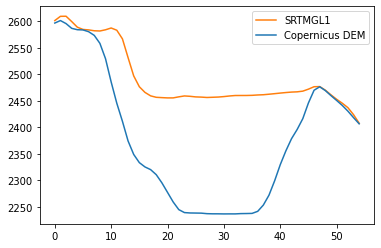

In [15]:
plt.plot(srtmgl1_heights, color='tab:orange', label='SRTMGL1')
plt.plot(cdem_heights, color='tab:blue', label='Copernicus DEM')

plt.legend(loc='upper right')
plt.show()